<a href="https://colab.research.google.com/github/eejyoo/2022-2-ML/blob/main/ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

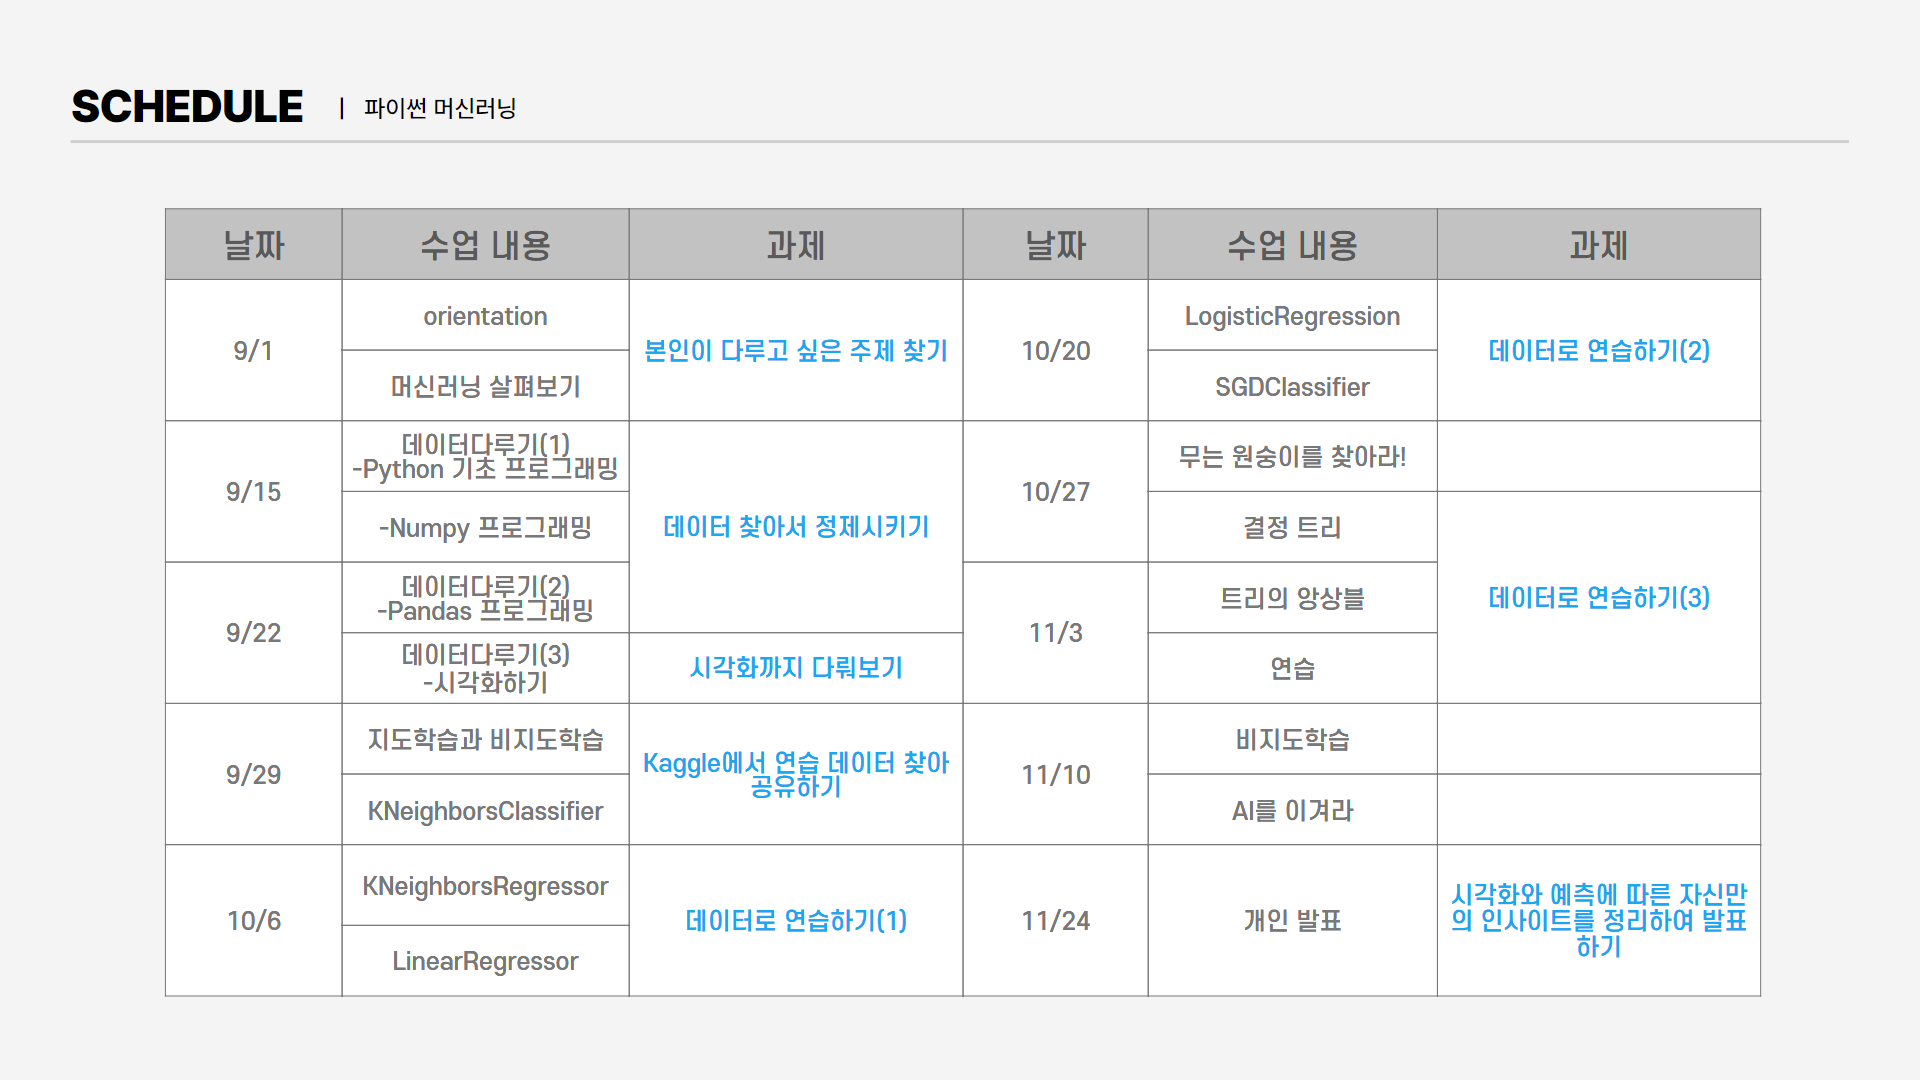

#0. Orientation

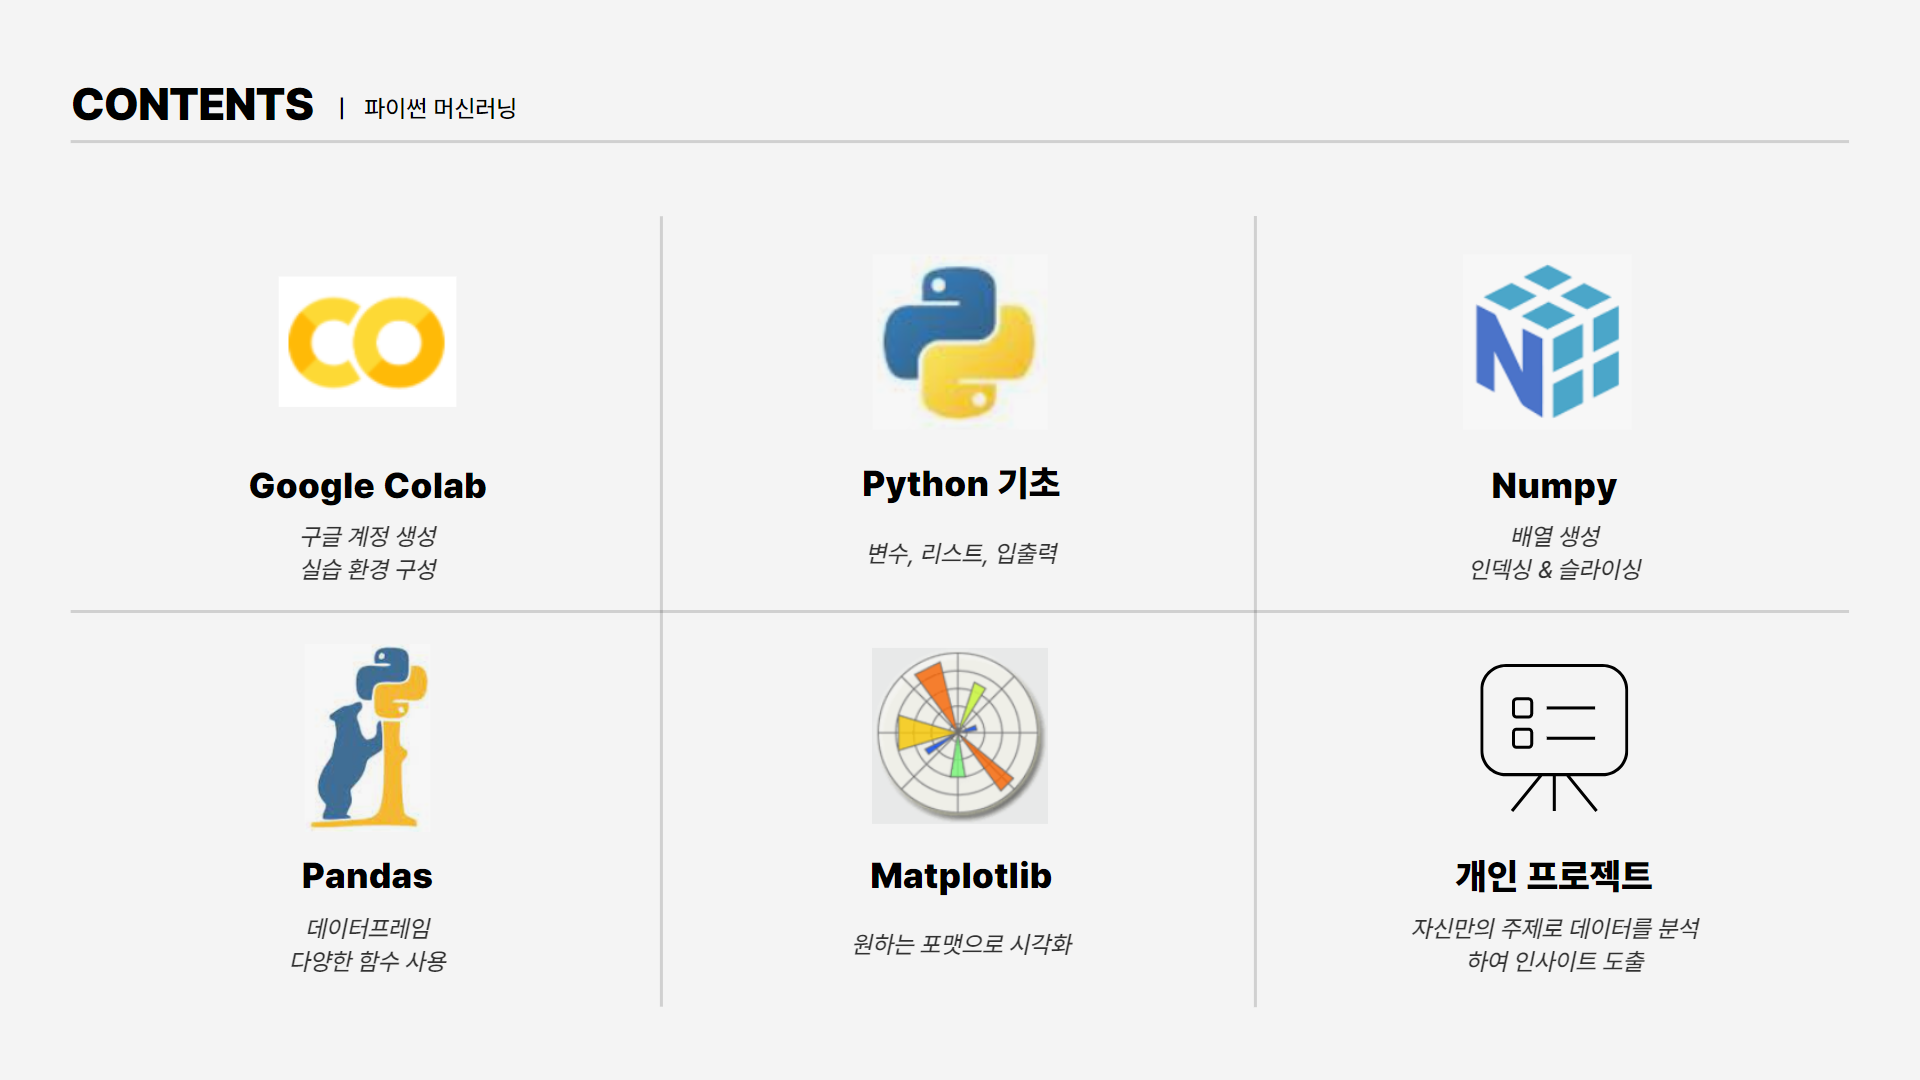

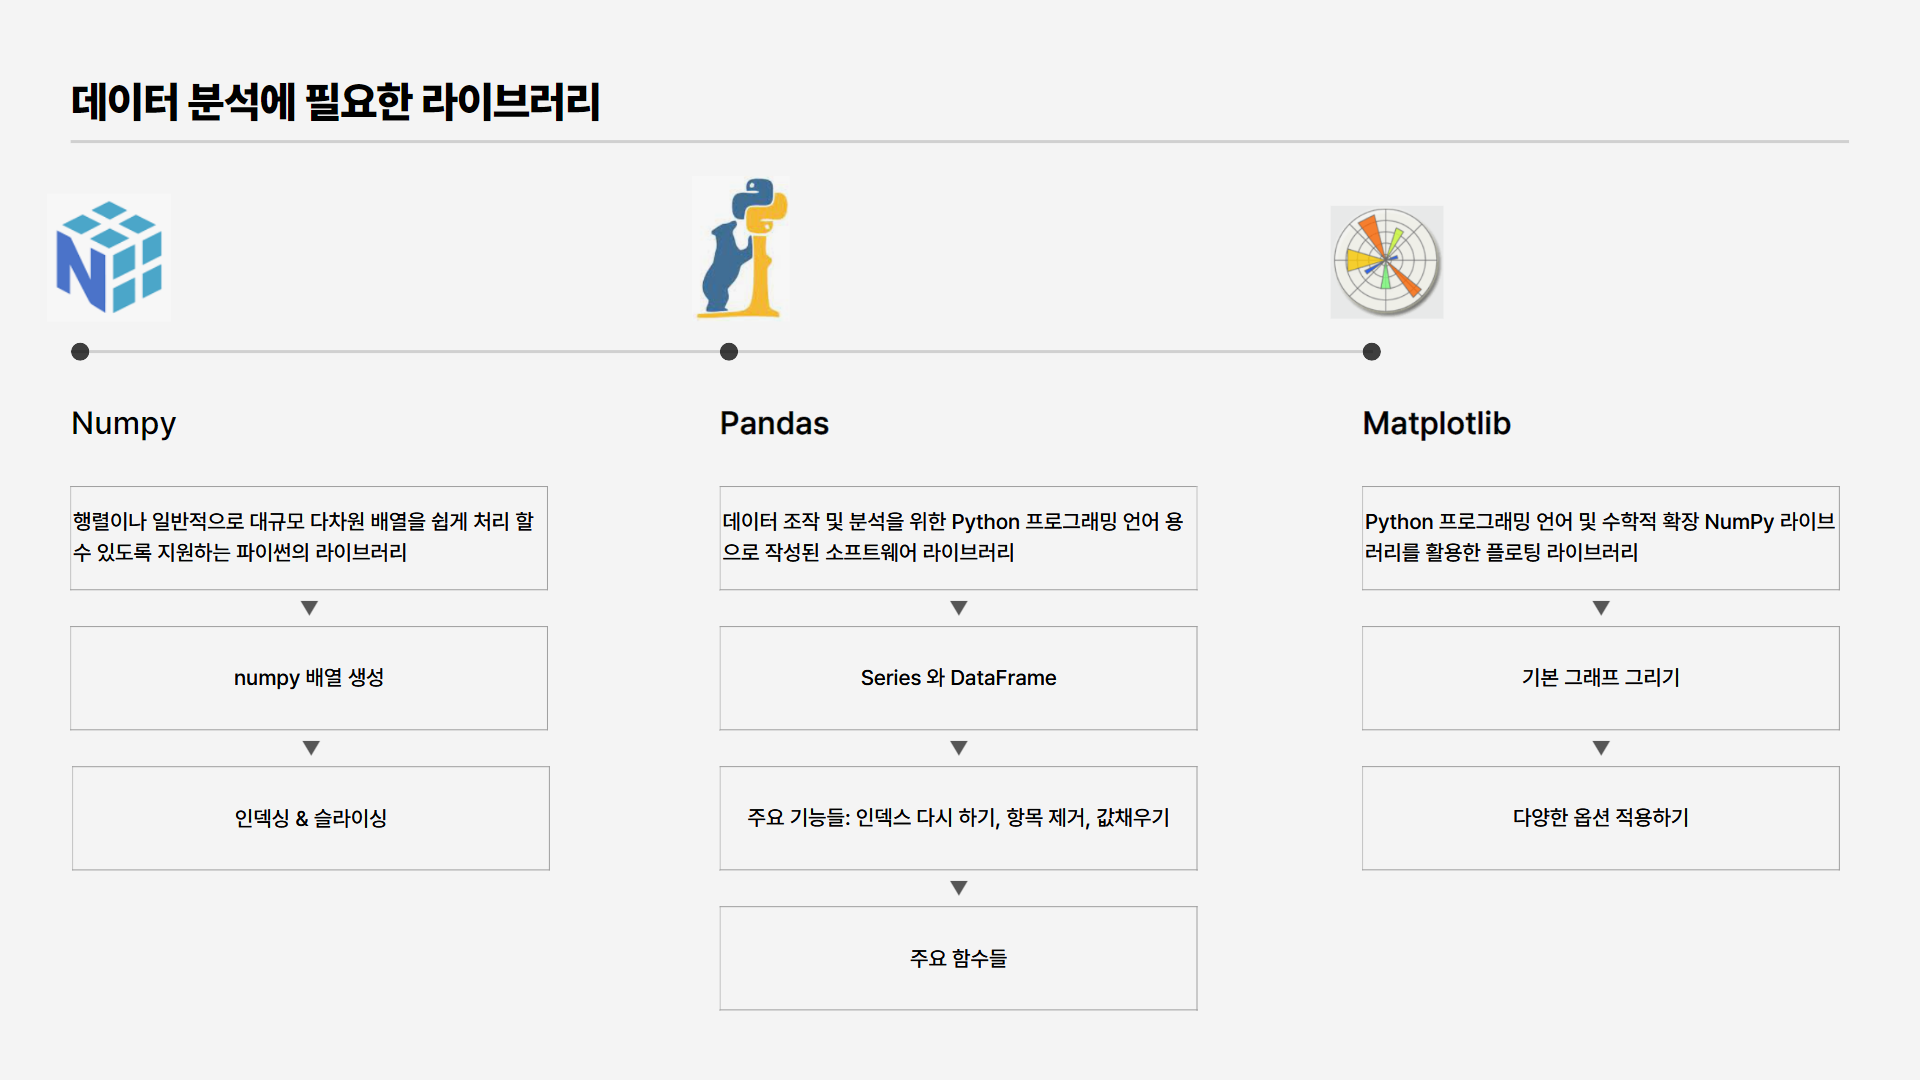

# 1. 머신러닝 살펴보기

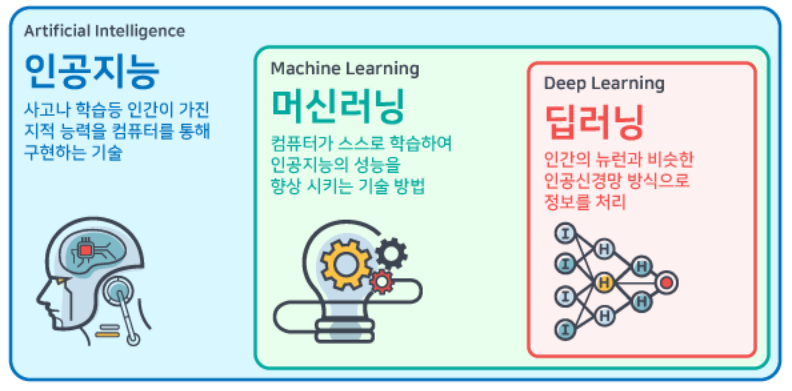
<br>
출처: https://codechasseur.tistory.com/8

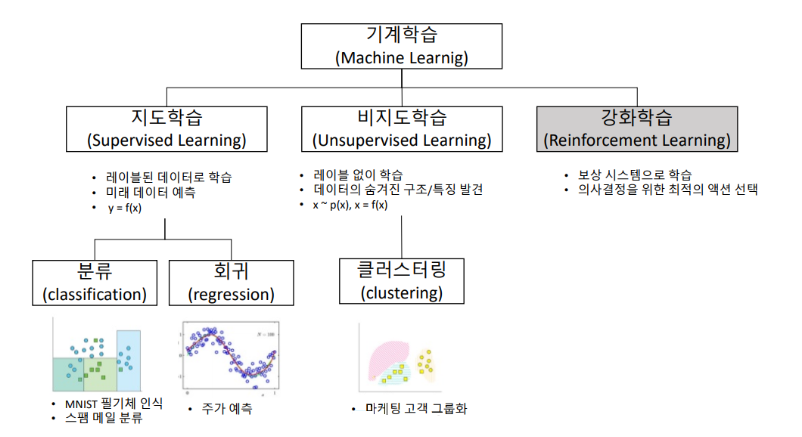
<br>출처: https://bestpractice80.tistory.com/2

붓꽃 분류하기(출처 : http://mirlab.org/의 아이리스 항목)
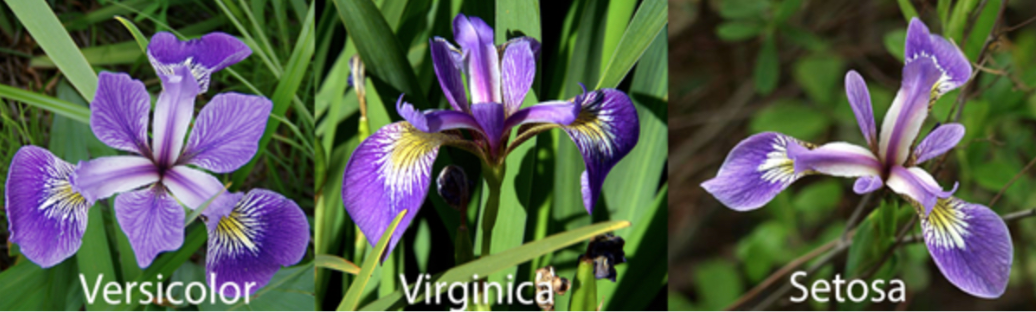

(1) 데이터 가져오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input/Iris.csv')

(2) 데이터 살펴보기

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Species 별로 개수를 세시오.
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- 4개의 특성(sepal length, sepal width, petal length, petal width)을 가진 150개 데이터
- 각 종류(setosa, wersicolor, virginica)마다 50개의 데이터
- 결측값 없음

(3) 데이터 시각화하기

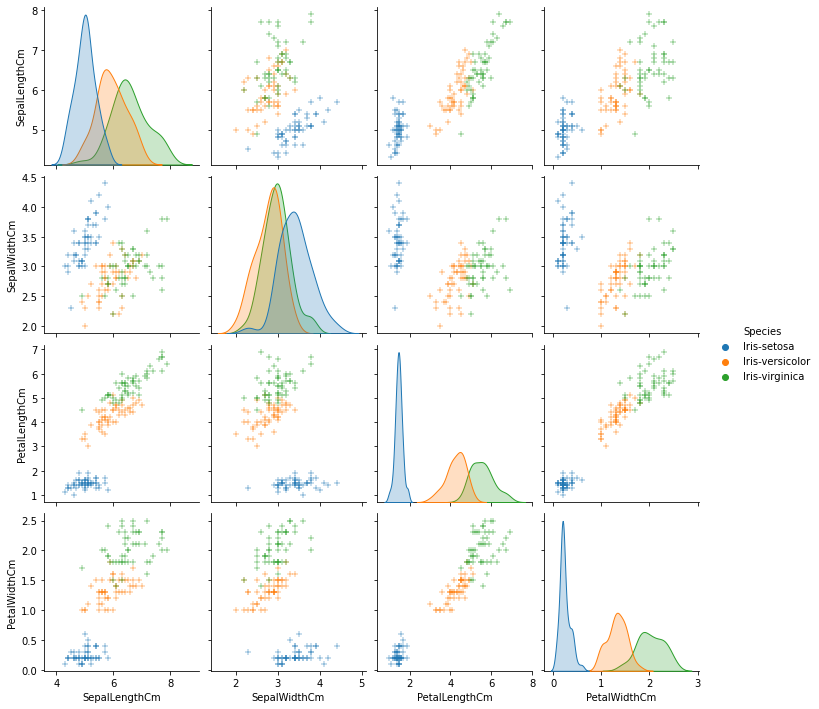

In [ ]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

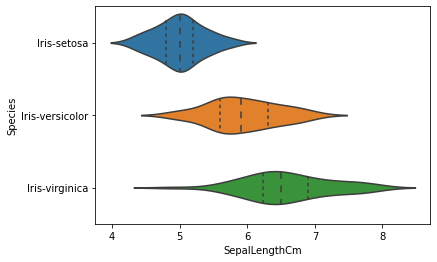

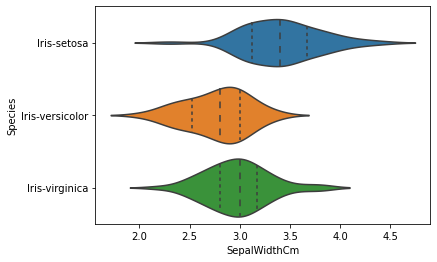

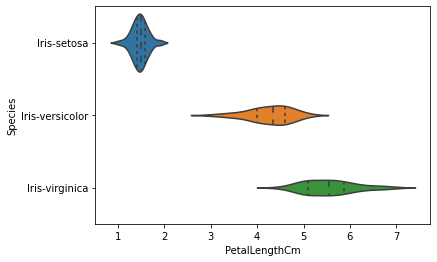

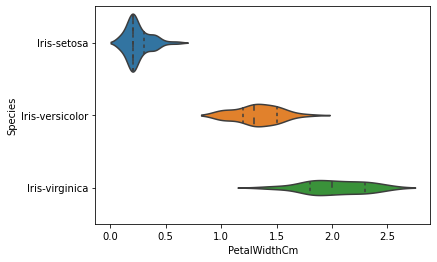

In [ ]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

- setosa 종은 다른 두 종과 다른 점을 띄고 있음.
- setosa 외 다른 두 종은 유사한 점이 있음.


(4) 모델링하기

In [ ]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


** train 세트와 test 세트로 나누기

In [ ]:
# 라이브러리 추가
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# train, test 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

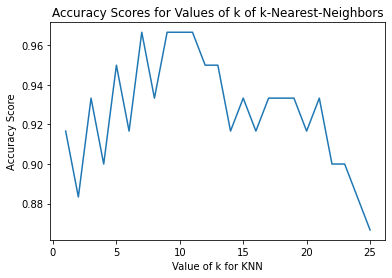

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
# 로지스틱 회귀 사용
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9166666666666666


In [ ]:
# 가장 최적인 n으로 KNN 다시 돌리기
